In [1]:
from openbb_terminal.sdk import openbb
import pandas as pd
import numpy as np

%matplotlib inline

2023-06-01 18:51:59.764589: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Indicies df

In [2]:
data_indicies = openbb.economy.indices()
data_indicies[["Chg", "%Chg"]] = data_indicies[["Chg", "%Chg"]].apply(pd.to_numeric)
data_indicies = data_indicies.set_index(data_indicies.columns[0])
data_indicies

,Price,Chg,%Chg
,,,
DJIA,33061.57,153.30,0.47
Nasdaq Composite,13100.98,165.70,1.28
S&P 500,4221.02,41.19,0.99
DJ Total Stock Market,42030.78,413.48,0.99
Russell 2000,1767.94,18.29,1.05
NYSE Composite,15031.09,143.94,0.97
Barron's 400,907.10,11.74,1.31
CBOE Volatility,15.65,-2.29,-12.76
DJIA Futures,33140,37.00,0.11


In [3]:
def highlight_max(cell):
    if type(cell) != str and cell < 0 :
        return 'background: red; color:black'
    else:
        return 'background: green; color: white'
  
data_indicies.style.applymap(highlight_max)

,Price,Chg,%Chg
,,,
DJIA,33061.57,153.300000,0.470000
Nasdaq Composite,13100.98,165.700000,1.280000
S&P 500,4221.02,41.190000,0.990000
DJ Total Stock Market,42030.78,413.480000,0.990000
Russell 2000,1767.94,18.290000,1.050000
NYSE Composite,15031.09,143.940000,0.970000
Barron's 400,907.10,11.740000,1.310000
CBOE Volatility,15.65,-2.290000,-12.760000
DJIA Futures,33140,37.000000,0.110000


In [4]:
# Dropdown to select chart for each index, would like this to the right of the heatmap in app

In [5]:
plot_onedf = openbb.economy.index(indices= ["dow_dji", "nasdaq", "sp500", "dow_djus", "russell2000", "nyse", "sp400", "cboe_vix"],
    interval = "1d",
    start_date = "2022-05-30",
    end_date = "2023-05-30",
    column = "Close",
    #returns: bool = False,
                    
)

plot_onedf

,dow_dji,nasdaq,sp500,dow_djus,russell2000,nyse,sp400,cboe_vix
Date,,,,,,,,
2022-05-31,32990.121094,12081.389648,4132.149902,1011.020020,1864.040039,15827.049805,2514.800049,26.190001
2022-06-01,32813.230469,11994.459961,4101.229980,1003.179993,1854.819946,15709.610352,2494.669922,25.690001
2022-06-02,33248.281250,12316.900391,4176.819824,1023.299988,1897.670044,15960.530273,2549.840088,24.719999
2022-06-03,32899.699219,12012.730469,4108.540039,1006.570007,1883.050049,15797.169922,2521.129883,24.790001
2022-06-06,32915.781250,12061.370117,4121.430176,1009.809998,1889.890015,15848.450195,2535.770020,25.070000
...,...,...,...,...,...,...,...,...
2023-05-22,33286.578125,12720.780273,4192.629883,1021.599976,1795.380005,15318.849609,2468.679932,17.209999
2023-05-23,33055.511719,12560.250000,4145.580078,1010.169983,1787.709961,15172.269531,2444.290039,18.530001
2023-05-24,32799.921875,12484.160156,4115.240234,1002.739990,1767.000000,15022.889648,2419.830078,20.030001


In [6]:
sp_futs = openbb.futures.historical(symbols = "ES", start_date = "2022-05-30", end_date = "2023-05-30")
sp_futs = sp_futs.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
dow_futs = openbb.futures.historical(symbols = "YM", start_date = "2022-05-30", end_date = "2023-05-30")
dow_futs = dow_futs.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])

In [7]:
indicies_plot_df = pd.concat([plot_onedf, dow_futs, sp_futs], axis=1)
indicies_plot_df.columns = ["DJIA", "Nasdaq Composite", "S&P 500", "DJ Total Stock Market", "Russell 2000",
                            "NYSE Composite", "Barron's 400", "CBOE Volatility", "DJIA Futures", "S&P 500 Futures"
                           
]
indicies_plot_df

,DJIA,Nasdaq Composite,S&P 500,DJ Total Stock Market,Russell 2000,NYSE Composite,Barron's 400,CBOE Volatility,DJIA Futures,S&P 500 Futures
Date,,,,,,,,,,
2022-05-31,32990.121094,12081.389648,4132.149902,1011.020020,1864.040039,15827.049805,2514.800049,26.190001,32971.0,4131.25
2022-06-01,32813.230469,11994.459961,4101.229980,1003.179993,1854.819946,15709.610352,2494.669922,25.690001,32798.0,4099.00
2022-06-02,33248.281250,12316.900391,4176.819824,1023.299988,1897.670044,15960.530273,2549.840088,24.719999,33223.0,4175.25
2022-06-03,32899.699219,12012.730469,4108.540039,1006.570007,1883.050049,15797.169922,2521.129883,24.790001,32888.0,4107.00
2022-06-06,32915.781250,12061.370117,4121.430176,1009.809998,1889.890015,15848.450195,2535.770020,25.070000,32912.0,4120.50
...,...,...,...,...,...,...,...,...,...,...
2023-05-22,33286.578125,12720.780273,4192.629883,1021.599976,1795.380005,15318.849609,2468.679932,17.209999,33360.0,4205.00
2023-05-23,33055.511719,12560.250000,4145.580078,1010.169983,1787.709961,15172.269531,2444.290039,18.530001,33132.0,4158.75
2023-05-24,32799.921875,12484.160156,4115.240234,1002.739990,1767.000000,15022.889648,2419.830078,20.030001,32854.0,4126.00


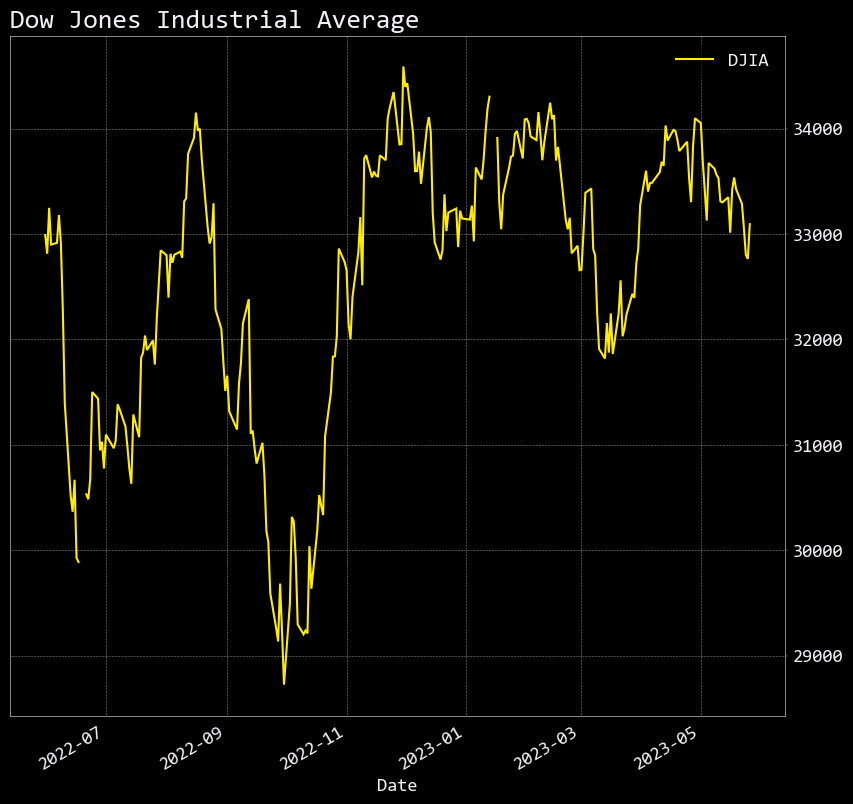

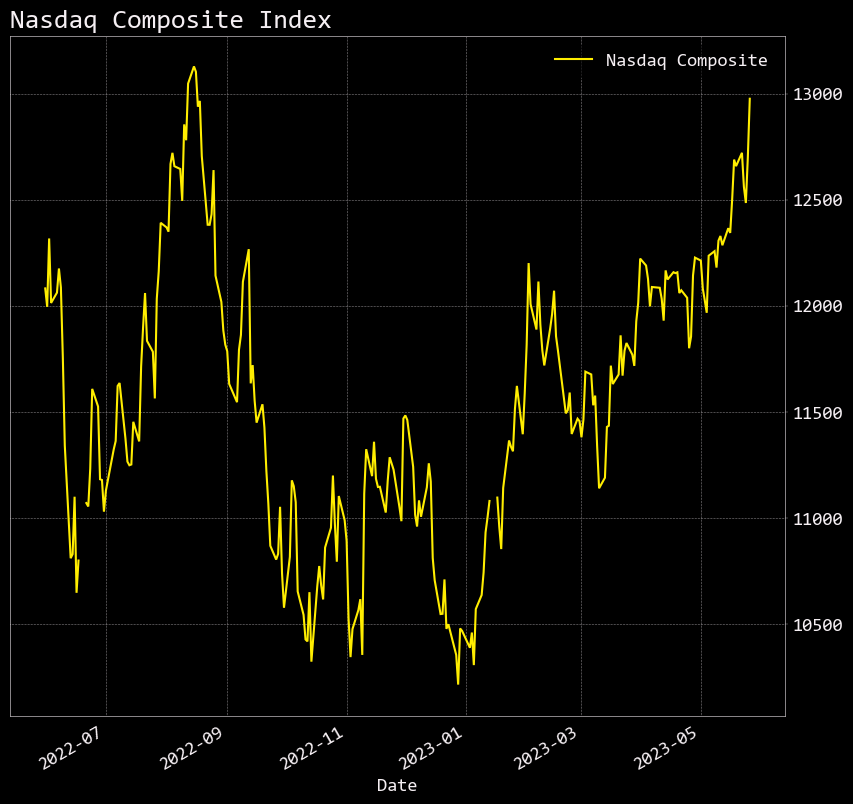

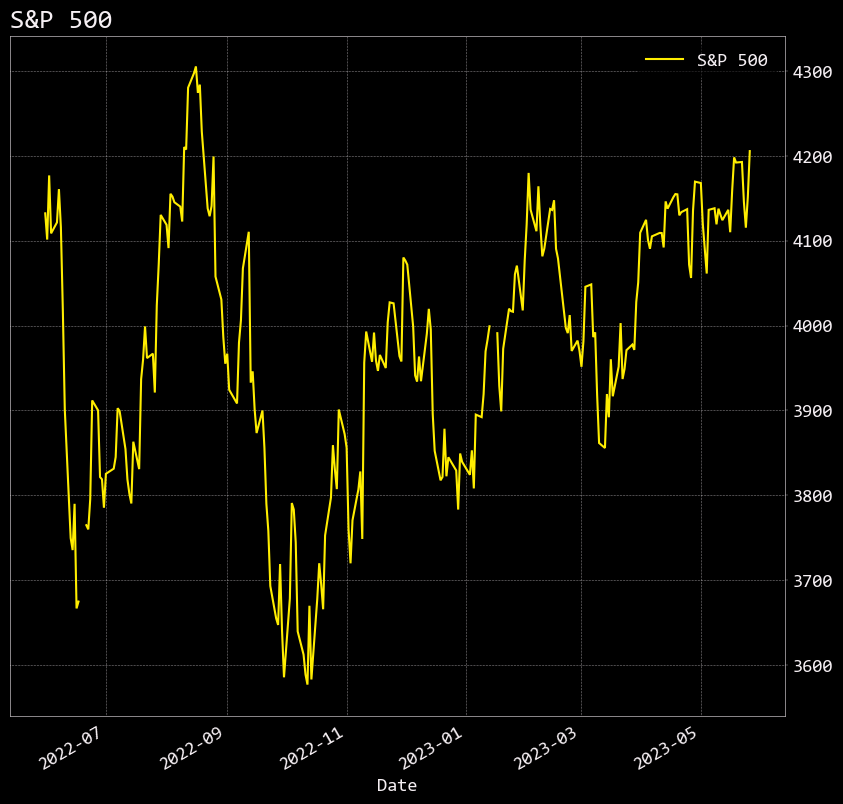

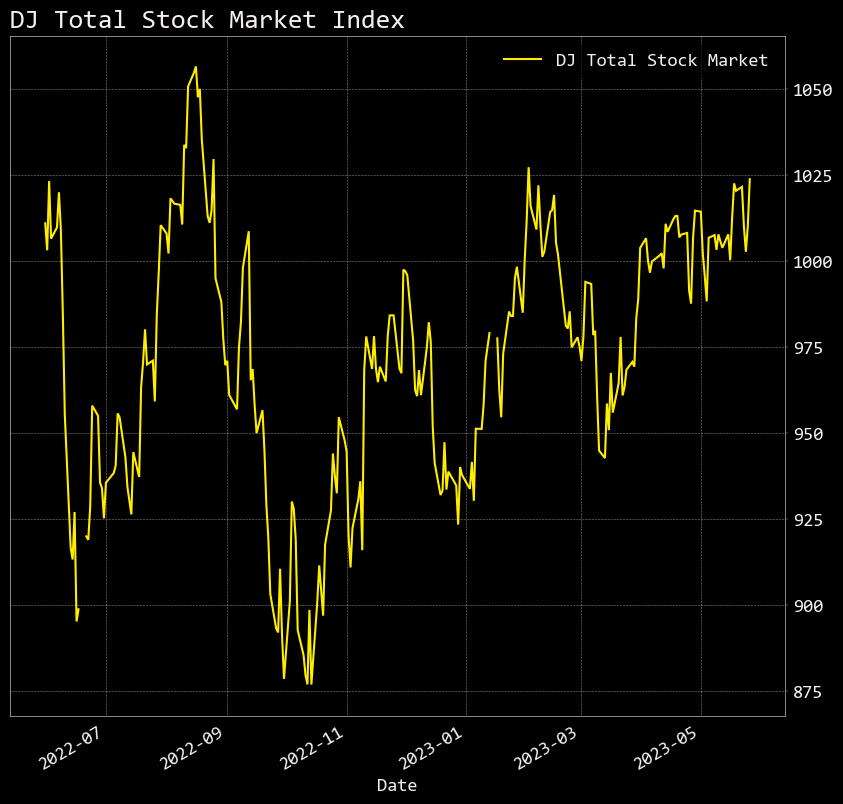

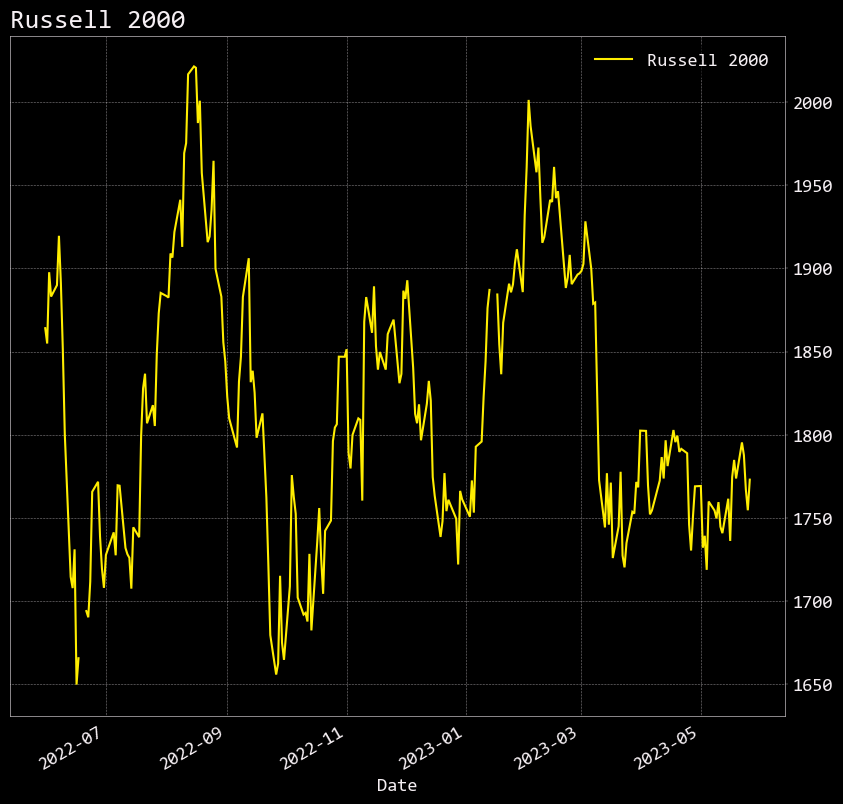

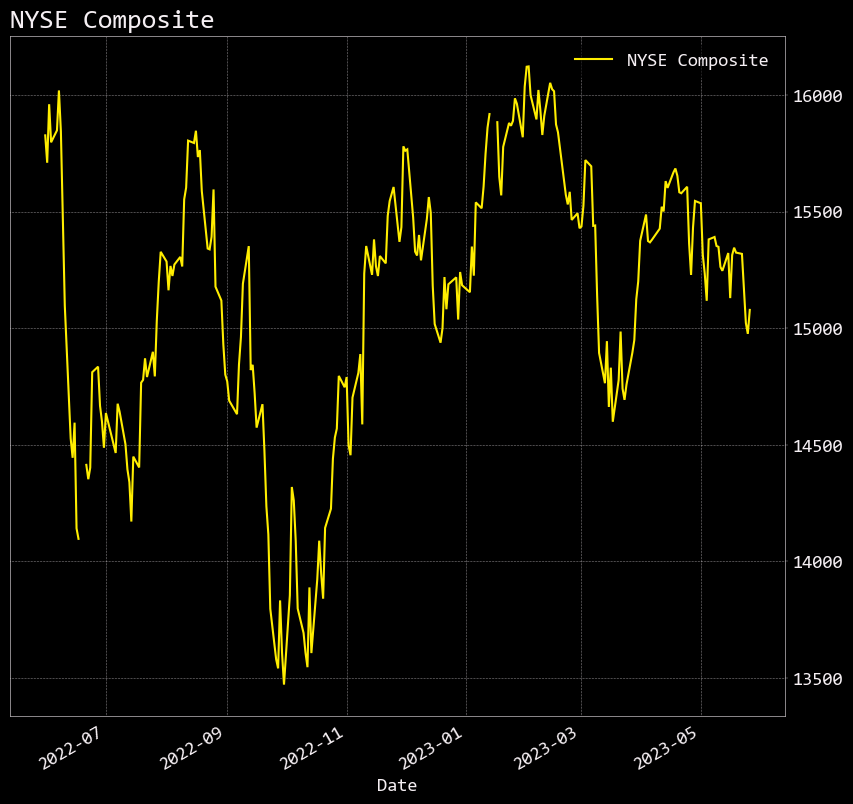

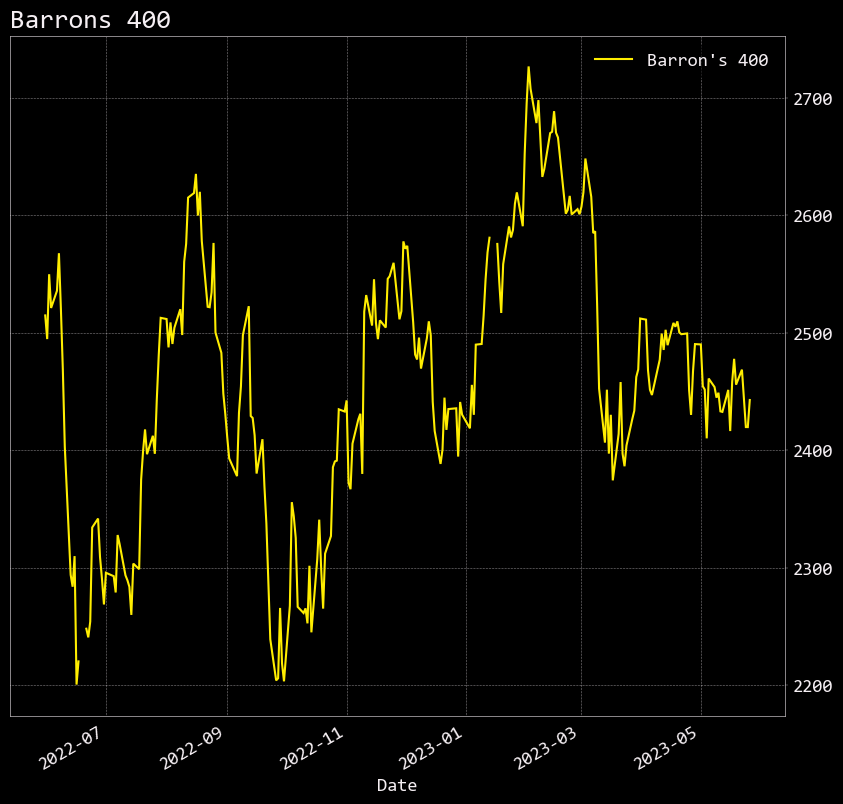

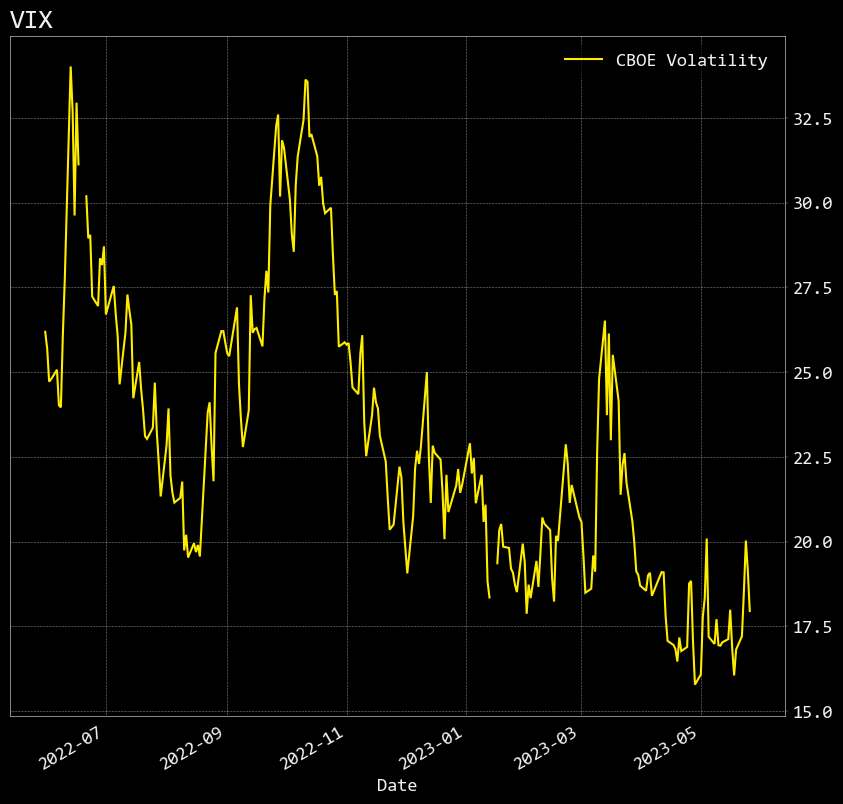

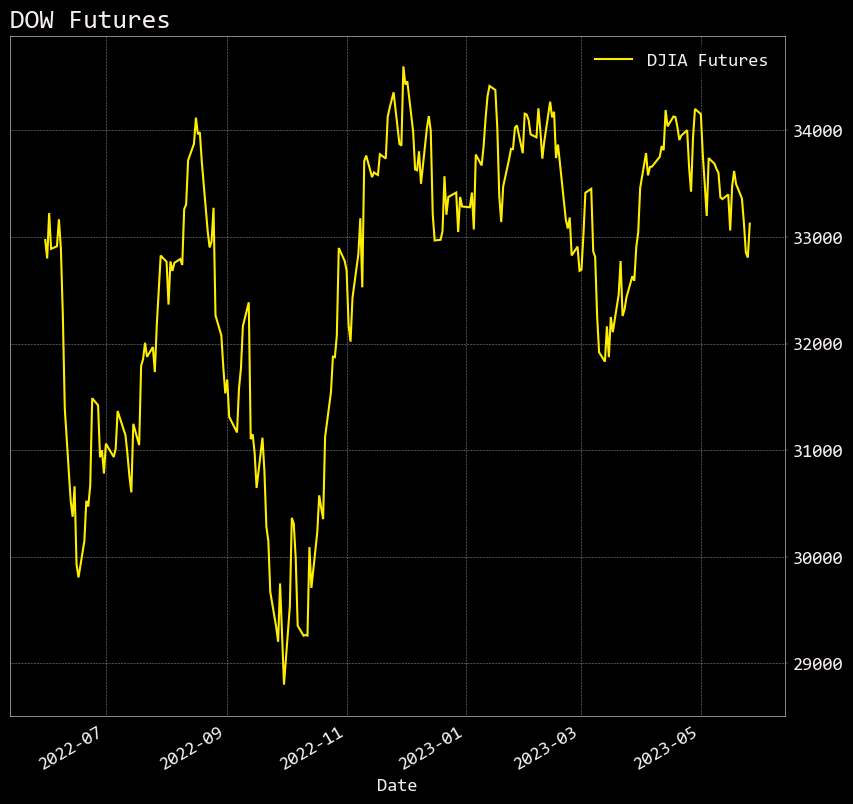

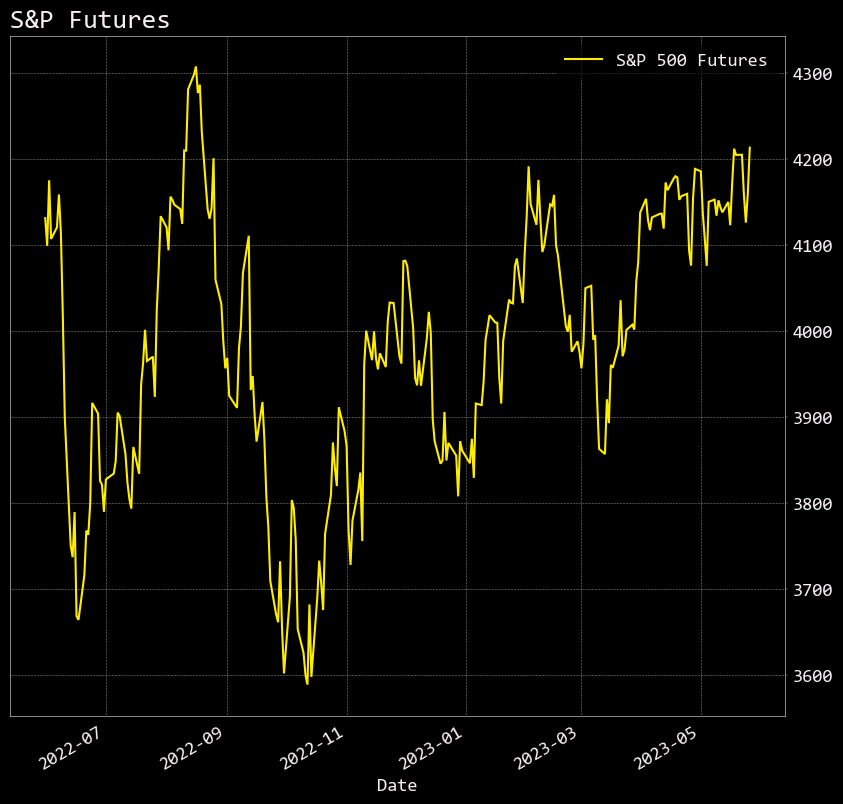

In [26]:
djia = indicies_plot_df.plot(y=["DJIA"], figsize = (10,10), title = "Dow Jones Industrial Average")
nasdaq = indicies_plot_df.plot(y=["Nasdaq Composite"], figsize = (10,10), title = "Nasdaq Composite Index")
sp500 = indicies_plot_df.plot(y=["S&P 500"], figsize = (10,10), title = "S&P 500")
total = indicies_plot_df.plot(y=["DJ Total Stock Market"], figsize = (10,10), title = "DJ Total Stock Market Index")
rut = indicies_plot_df.plot(y=["Russell 2000"], figsize = (10,10), title = "Russell 2000")
nyse = indicies_plot_df.plot(y=["NYSE Composite"], figsize = (10,10), title = "NYSE Composite")
baron = indicies_plot_df.plot(y=["Barron's 400"], figsize = (10,10), title = "Barrons 400")
vix = indicies_plot_df.plot(y=["CBOE Volatility"], figsize = (10,10), title = "VIX")
djifuts = indicies_plot_df.plot(y=["DJIA Futures"], figsize = (10,10), title = "DOW Futures")
spfuts = indicies_plot_df.plot(y=["S&P 500 Futures"], figsize = (10,10), title = "S&P Futures")

<AxesSubplot: title={'left': 'All Indicies'}, xlabel='Date'>

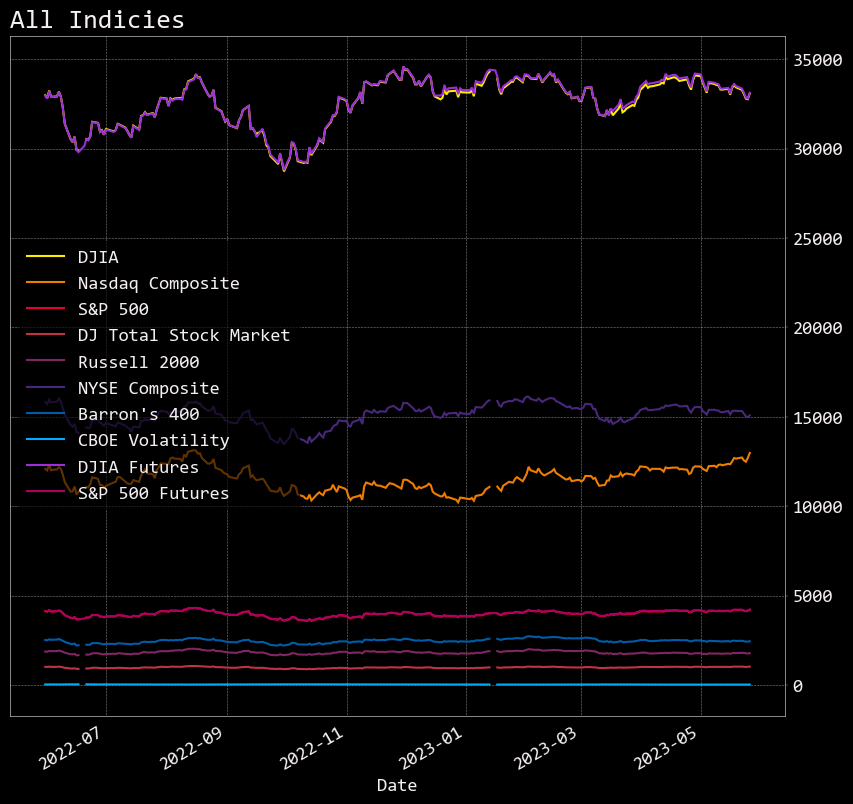

In [25]:
indicies_plot_df.plot(
    title = "All Indicies",
    figsize = (10,10), 
    #logy = True

)

In [ ]:
#How to make plot for drop down??

In [55]:
#openbb.economy.available_indices()

# Commodities

In [19]:
data_commodities = openbb.economy.futures()
data_commodities[["Chg", "%Chg"]] = data_commodities[["Chg", "%Chg"]].apply(pd.to_numeric)
data_commodities = data_commodities.set_index(data_commodities.columns[0])
data_commodities

,Price,Chg,%Chg
,,,
Crude Oil,69.47,0.0100,0.01
Brent Crude,73.75,0.0400,0.05
Gold,1978.00,0.9000,0.05
Silver,23.290,0.0510,0.22
Natural Gas,2.310,-0.0170,-0.73
Unleaded Gasoline,2.4835,0.0043,0.17
Copper,3.6590,-0.0040,-0.11
Corn,592.00,-2.0000,-0.34
Wheat,585.75,-5.2500,-0.89


In [20]:
data_commodities.style.applymap(highlight_max)

,Price,Chg,%Chg
,,,
Crude Oil,69.47,0.010000,0.010000
Brent Crude,73.75,0.040000,0.050000
Gold,1978.00,0.900000,0.050000
Silver,23.290,0.051000,0.220000
Natural Gas,2.310,-0.017000,-0.730000
Unleaded Gasoline,2.4835,0.004300,0.170000
Copper,3.6590,-0.004000,-0.110000
Corn,592.00,-2.000000,-0.340000
Wheat,585.75,-5.250000,-0.890000


In [58]:
#openbb.economy.available_indices()

In [66]:
symbols = ["cl", "bz", "gc", "si", "ng", "rb", "hg", "zc", "zw"]

In [72]:
tot_df = openbb.futures.historical(symbols = symbols, start_date = "2022-05-30", end_date = "2023-05-30")
tot_df = tot_df.iloc[:,0:9]
tot_df.columns = ['BZ','CL','GC','HG','NG','RB','SI','ZC','ZW']
tot_df

,BZ,CL,GC,HG,NG,RB,SI,ZC,ZW
Date,,,,,,,,,
2022-05-31,122.839996,114.669998,1842.699951,4.2950,8.145,4.0804,21.650999,753.50,1087.50
2022-06-01,116.290001,115.260002,1843.300049,4.3300,8.696,4.0716,21.884001,731.25,1041.25
2022-06-02,117.610001,116.870003,1866.500000,4.5540,8.485,4.1909,22.254000,730.25,1058.25
2022-06-03,119.720001,118.870003,1845.400024,4.4775,8.523,4.2522,21.889999,727.00,1040.00
2022-06-06,119.510002,118.500000,1839.199951,4.4395,9.322,4.1930,22.073999,742.50,1093.00
...,...,...,...,...,...,...,...,...,...
2023-05-22,75.989998,71.989998,1974.800049,3.6740,2.400,2.6489,23.715000,571.00,606.25
2023-05-23,76.839996,72.910004,1972.400024,3.6415,2.321,2.6622,23.474001,577.50,622.25
2023-05-24,78.360001,74.339996,1962.800049,3.5535,2.398,2.7212,23.115000,587.25,606.25


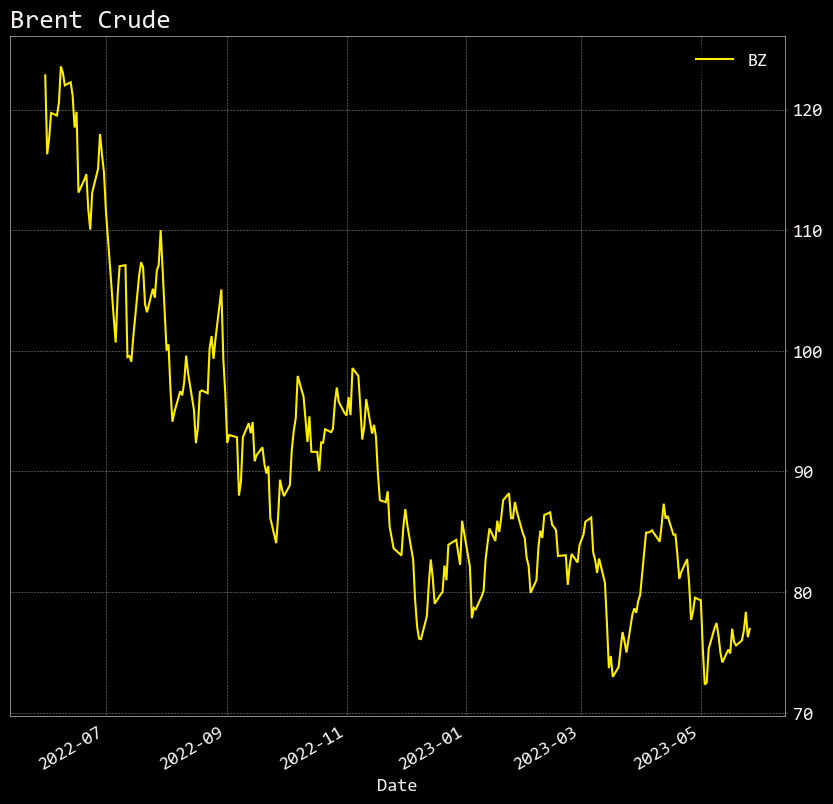

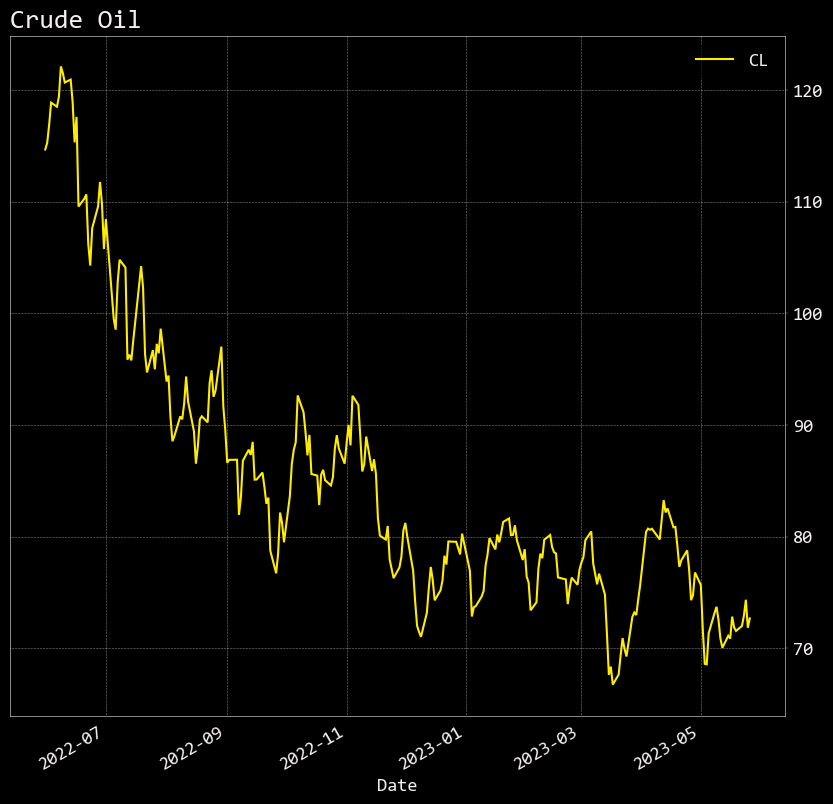

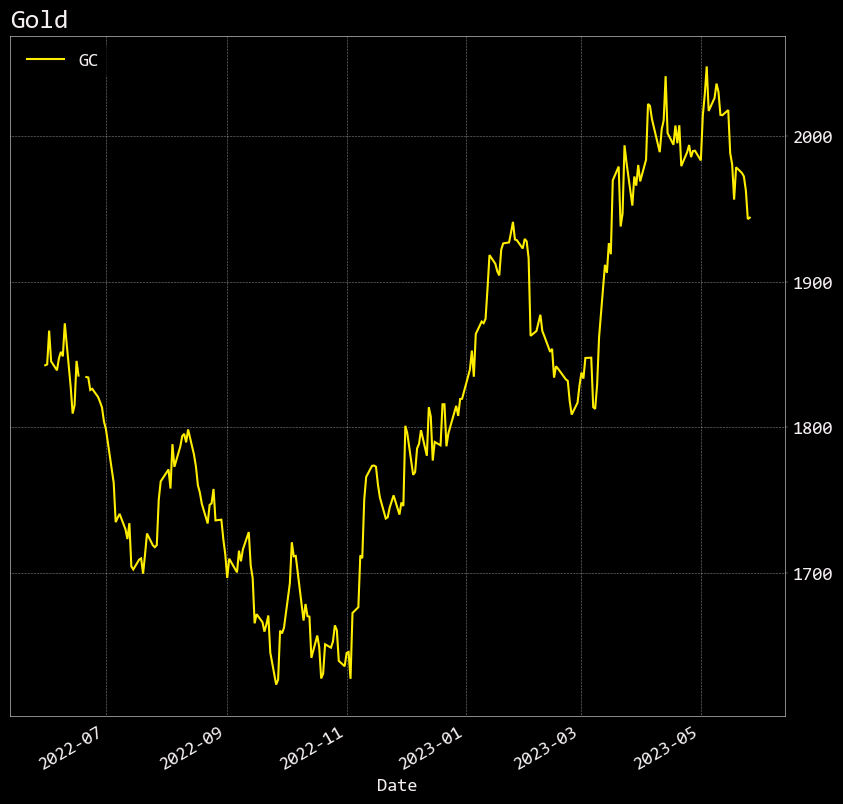

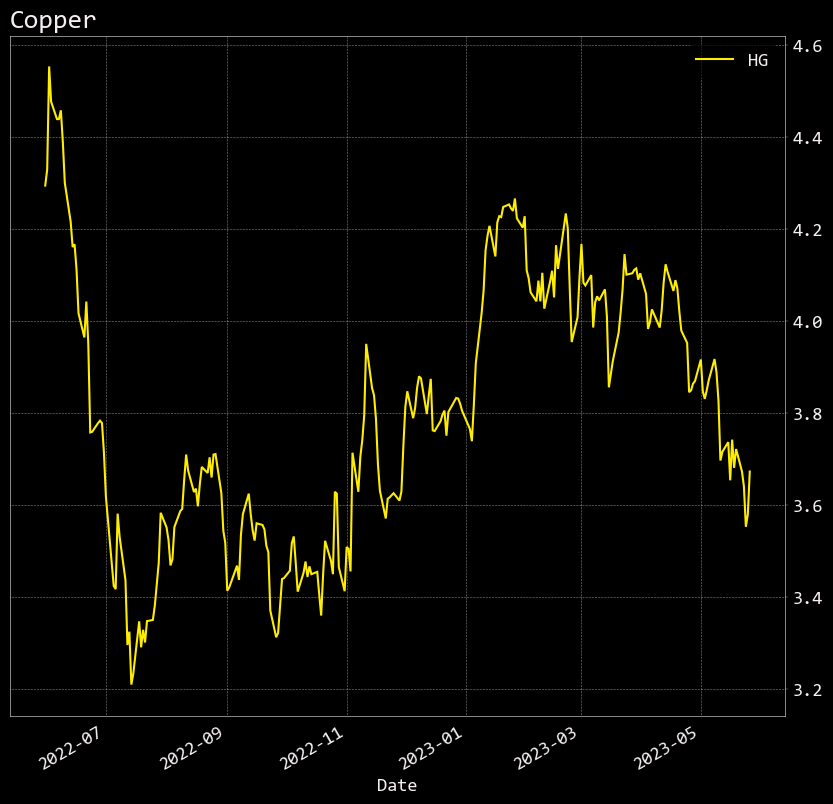

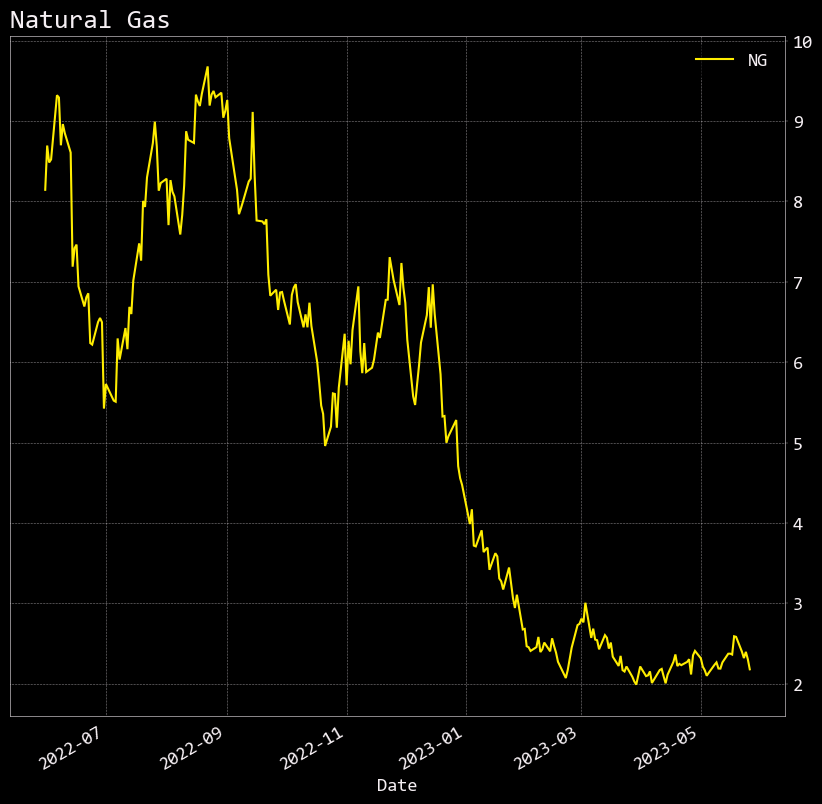

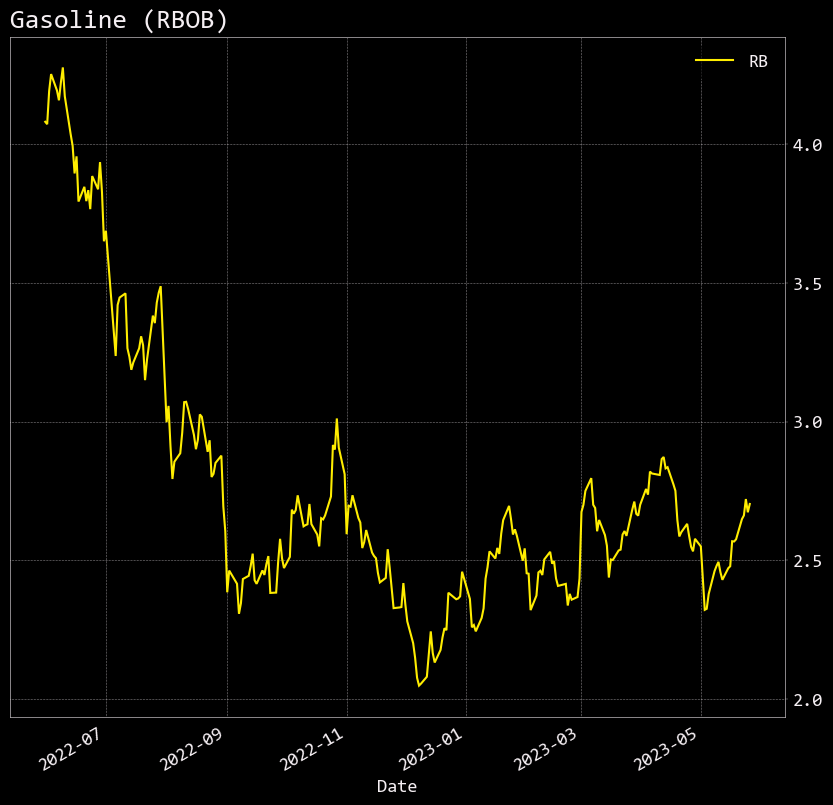

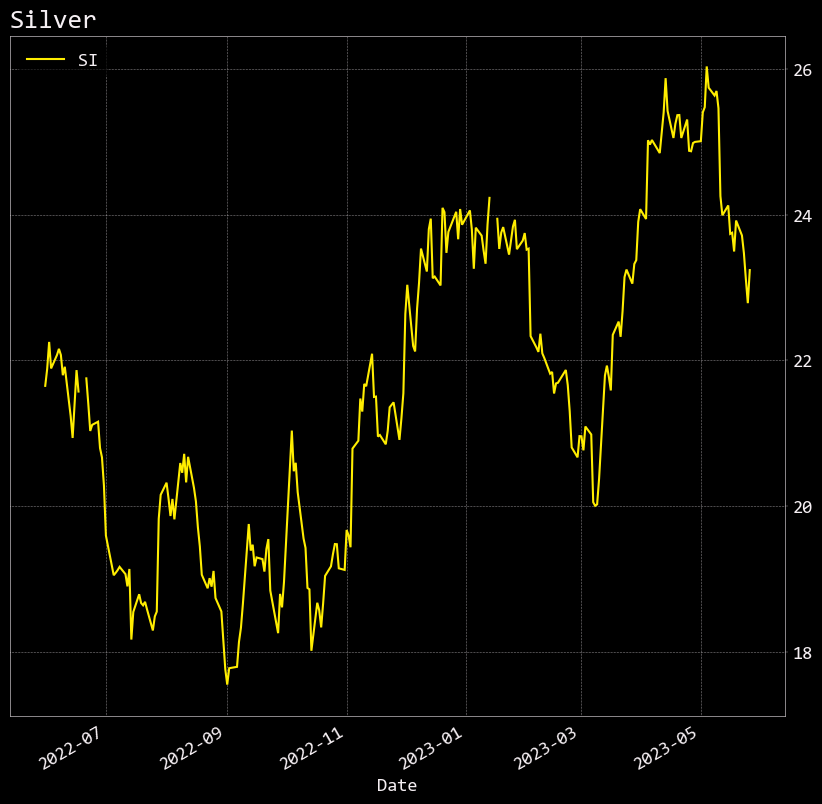

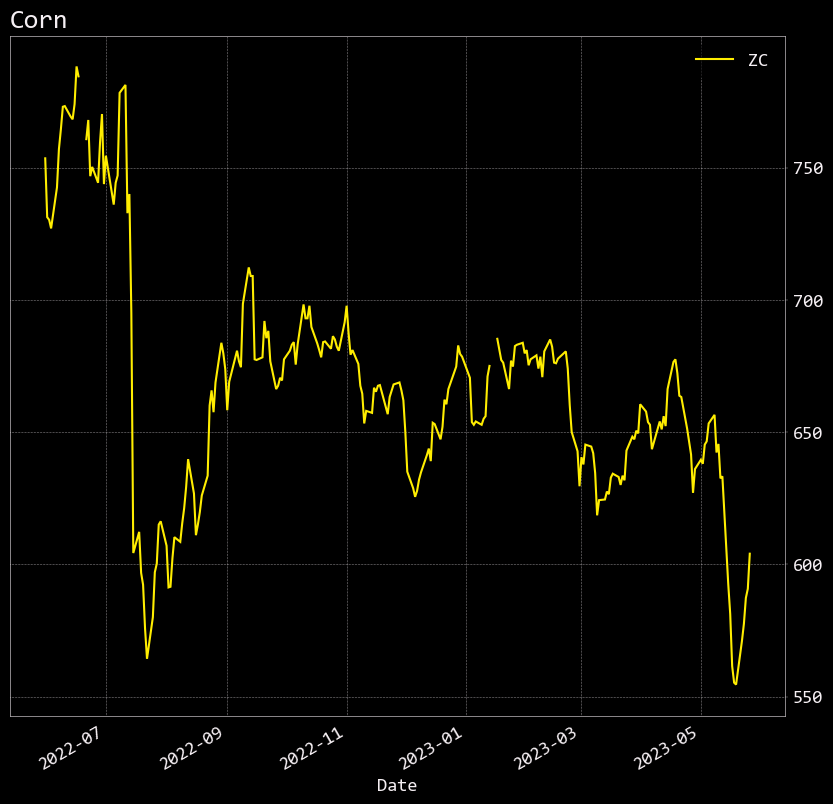

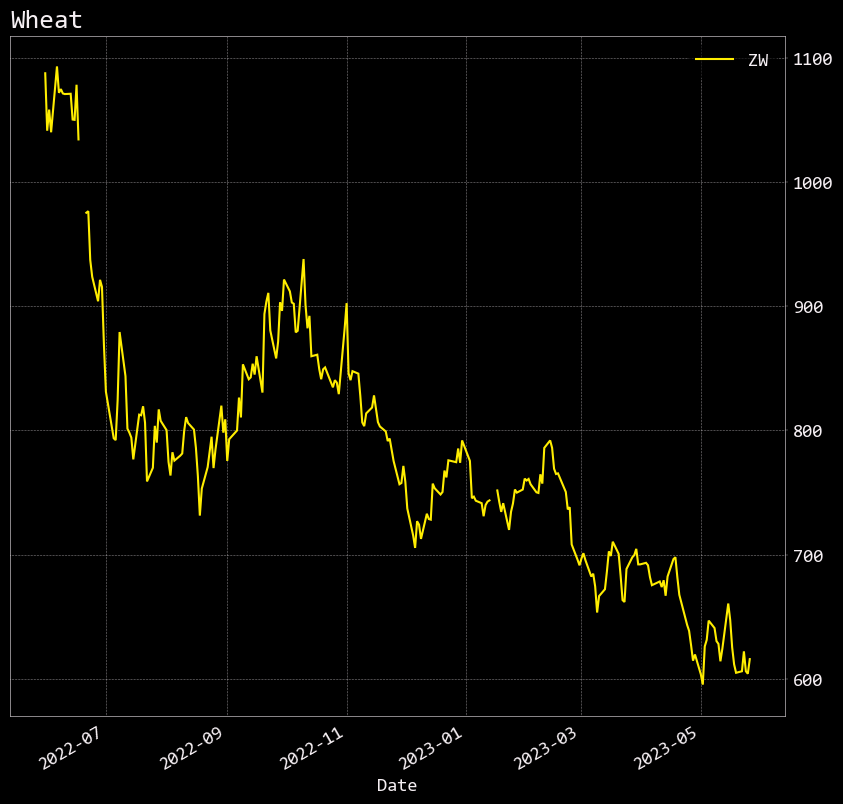

In [74]:
brent = tot_df.plot(y=["BZ"], figsize = (10,10), title = "Brent Crude")
crude = tot_df.plot(y=["CL"], figsize = (10,10), title = "Crude Oil")
gold = tot_df.plot(y=["GC"], figsize = (10,10), title = "Gold")
copper = tot_df.plot(y=["HG"], figsize = (10,10), title = "Copper")
natgas = tot_df.plot(y=["NG"], figsize = (10,10), title = "Natural Gas")
rbob = tot_df.plot(y=["RB"], figsize = (10,10), title = "Gasoline (RBOB)")
silver = tot_df.plot(y=["SI"], figsize = (10,10), title = "Silver")
corn = tot_df.plot(y=["ZC"], figsize = (10,10), title = "Corn")
wheat = tot_df.plot(y=["ZW"], figsize = (10,10), title = "Wheat")

In [65]:
# get bloomberg commodity index BCOM
#symbol = ["BCOM"]
#openbb.economy.index(symbol, start_date = "2022-05-30", end_date = "2023-05-30")
openbb.stocks.load("bcom")


1 Failed download:
- BCOM: No timezone found, symbol may be delisted


""
